In [ ]:
import cifar10
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [ ]:
cifar10.data_path = "data/CIFAR-10/"

In [ ]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [ ]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [ ]:
images_train.shape

(50000, 32, 32, 3)

In [ ]:
cls_train.shape

(50000,)

In [ ]:
labels_train.shape

(50000, 10)

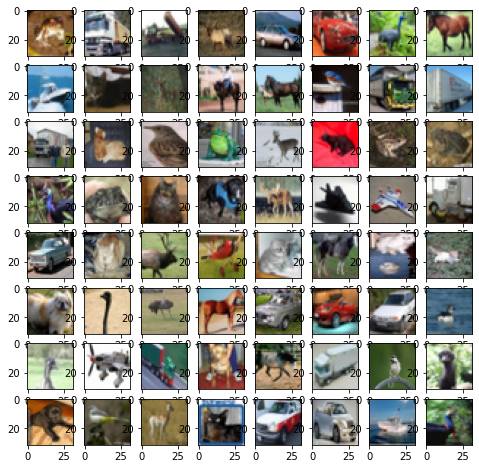

In [ ]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
  ax=fig.add_subplot(8,8,i+1)
  ax.imshow(images_train[i])
plt.show()

In [ ]:
x_train=images_train.reshape((50000,3072))

In [ ]:
x_test=images_test.reshape((10000,3072))

In [ ]:
Pca=PCA()
Pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
Pca.components_.shape

(3072, 3072)

In [ ]:
total=Pca.explained_variance_.sum()
k=0
curr_var=0
while curr_var/total<0.95:
  curr_var+=Pca.explained_variance_[k]
  k+=1
k

217

In [ ]:
pca=PCA(n_components=k,whiten=True)
x_train_pca=pca.fit_transform(x_train)
x_train_pca.shape

(50000, 217)

In [ ]:
x_approx=pca.inverse_transform(x_train_pca)

In [ ]:
x_approx.shape

(50000, 3072)

In [ ]:
x_approx_images=x_approx.reshape((50000,32,32,3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

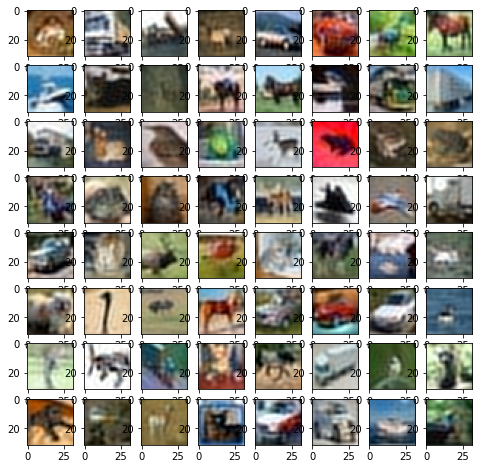

In [ ]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
  ax=fig.add_subplot(8,8,i+1)
  ax.imshow(x_approx_images[i])
plt.show()

In [ ]:
x_test_pca=pca.transform(x_test)
x_test_pca.shape

(10000, 217)

In [ ]:
scaler=StandardScaler()
x_train_pca_s=scaler.fit_transform(x_train_pca)
x_test_pca_s=scaler.transform(x_test_pca)

In [ ]:
clf=SVC()
grid={'C':[1,10,50,100],"gamma":[1e-3,1e-4,5e-3,5e-4]}
abc=GridSearchCV(clf,grid)
abc.fit(x_train_pca_s,cls_train)

In [ ]:
abc.best_estimator_

NameError: ignored

In [ ]:
clf=RandomForestClassifier()
clf.fit(x_train_pca,cls_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=clf.predict(x_test_pca)

In [ ]:
y_pred.shape


(10000,)

In [ ]:
print(classification_report(cls_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.54      0.53      1000
           1       0.47      0.55      0.51      1000
           2       0.32      0.28      0.30      1000
           3       0.29      0.26      0.27      1000
           4       0.42      0.40      0.41      1000
           5       0.35      0.34      0.35      1000
           6       0.47      0.53      0.50      1000
           7       0.52      0.40      0.45      1000
           8       0.54      0.60      0.57      1000
           9       0.44      0.47      0.45      1000

    accuracy                           0.44     10000
   macro avg       0.43      0.44      0.43     10000
weighted avg       0.43      0.44      0.43     10000



In [ ]:
import numpy as np
ans = [str(class_names[int(i)]) for i in cls_test]
ans=np.array(ans)
ans

array(['cat', 'ship', 'ship', ..., 'dog', 'automobile', 'horse'],
      dtype='<U10')

In [ ]:
np.savetxt("cifar-10_predictions.csv",ans,fmt='%s')